# Linear Regression in Python

In [79]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

อ่านชุดข้อมูลต้นฉบับจากไฟล์ CSV

In [80]:
df = pd.read_csv('~/Desktop/data/regression.csv', header=None)

## 1.การเตรียมข้อมูล

In [81]:
df.columns = ['col1', 'col2']

ตรวจสอบคุณลักษณะของข้อมูล

In [82]:
df.head()

,col1,col2
0,18,10
1,19,9
2,16,8
3,15,7
4,14,6


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
col1    15 non-null int64
col2    15 non-null int64
dtypes: int64(2)
memory usage: 320.0 bytes


In [84]:
x = df['col1']
y = df['col2']

ดูการกระจายตัว และความสัมพันธ์ของข้อมูลโดยการสร้างกราฟแบบ Scatter

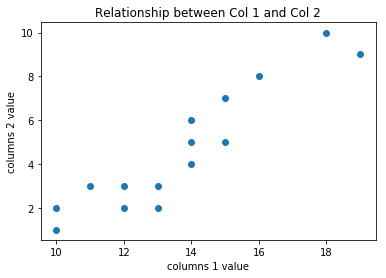

In [85]:
plt.scatter(x, y)
plt.xlabel("columns 1 value")
plt.ylabel("columns 2 value")
plt.title("Relationship between Col 1 and Col 2")

## 2.การสร้างสมการ Regression

In [86]:
lm = LinearRegression(fit_intercept=True)

ทำการแปลงค่าข้อมูลที่อยู่ในรูปแบบของ Pandas Data Frame<br/>
ให้ปลายเป็น Numpy Array ที่ฟังก์ชัน fit() สามารถนำไปทำงานได้

In [87]:
print(x)
type(x)

0     18
1     19
2     16
3     15
4     14
5     12
6     14
7     13
8     15
9     10
10    10
11    11
12    12
13    13
14    14
Name: col1, dtype: int64


pandas.core.series.Series

In [88]:
X = x[:, np.newaxis]

print("Data structure of X :\n {}".format(X))
print("Type of X : {}".format(type(X)))
print("Format of X : {}".format(X.shape))

Data structure of X :
 [[18]
 [19]
 [16]
 [15]
 [14]
 [12]
 [14]
 [13]
 [15]
 [10]
 [10]
 [11]
 [12]
 [13]
 [14]]
Type of X : <class 'numpy.ndarray'>
Format of X : (15, 1)


ส่งค่าพารามิเตอร์ X, y ให้ฟังก์ชัน <strong>fit()</strong> ทำการประมวลผล

In [100]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

หาค่า R Square เพื่อตรวจสอบความสัมพันธ์ระหว่าง X และ y <br/>
ยิ่งมีค่าเข้าใกล้ 1 มากยิ่งดี

In [101]:
# Explained r-square scored: 1 is perfect prediction
print('r-square scored: %.3f' % lm.score(X, y))

r-square scored: 0.864


In [102]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [92]:
xfit = np.linspace(X.min(), X.max(), len(X))
yfit = lm.predict(xfit[:, np.newaxis])

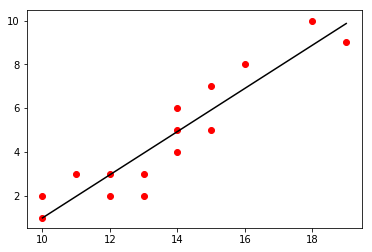

In [93]:
plt.scatter(X, y, color='r')
plt.plot(xfit, yfit, color='k');

In [94]:
print("B0 - Model intercept:", lm.intercept_)
print("B1 - Model slope:    ", lm.coef_[0])

B0 - Model intercept: -8.88720770289
B1 - Model slope:     0.986932599725


## 3.ใช้สมการ Linear Regression ที่ได้ทำนายข้อมูล

สมการ Linear regression คือ <br/>
y = β0 + Xβ1 <br/><br/>
X_predict คือ ชุดข้อมูลที่ต้องการทำนายผลลัพธ์

In [95]:
X_predict = np.random.randint(x.min(), x.max(), len(x))
X_predict

array([10, 10, 18, 13, 15, 11, 10, 17, 16, 12, 11, 15, 15, 10, 10])

นำชุดข้อมูลใน X_predict ไปทำนายหาค่า y โดยใช้ฟังก์ชัน predict

In [96]:
y_predict = lm.predict(X_predict[:, np.newaxis])
y_predict

array([ 0.98211829,  0.98211829,  8.87757909,  3.94291609,  5.91678129,
        1.96905089,  0.98211829,  7.89064649,  6.90371389,  2.95598349,
        1.96905089,  5.91678129,  5.91678129,  0.98211829,  0.98211829])

## 3.สร้างกราฟแสดงผลของการทำนาย
นำค่า y_predict มาสร้างกราฟ และเทียบกับชุดข้อมูลที่นำมาสร้างโมเดลการทำนาย

In [97]:
df_predict = pd.DataFrame({'Actual': X_predict, 'Y_Predicted': y_predict})  
df_predict

,Actual,Y_Predicted
0,10,0.982118
1,10,0.982118
2,18,8.877579
3,13,3.942916
4,15,5.916781
5,11,1.969051
6,10,0.982118
7,17,7.890646
8,16,6.903714
9,12,2.955983


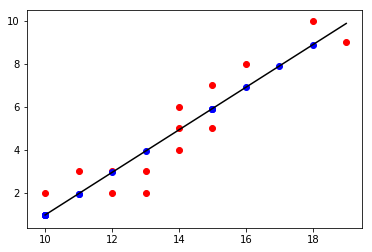

In [98]:
plt.scatter(X, y, color='r')
plt.scatter(X_predict, y_predict, color='b')
plt.plot(xfit, yfit, color='k');

## 4.ประเมินความแม่นย้ำในการทำนายของโมเดล
ข้อกำหนด จำนวนของ y_predict จะต้องเท่ากับจำนวน y

In [99]:
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y, y_predict))  
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y, y_predict))  
print('Root Mean Squared Error: %.2f' % np.sqrt(metrics.mean_squared_error(y, y_predict)))

Mean Absolute Error: 2.92
Mean Squared Error: 15.36
Root Mean Squared Error: 3.92
